<a href="https://colab.research.google.com/github/Hit07/ML-DL-Torch/blob/main/Pytorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PyTorch Workflow**
1. Prepare and load data
2. Build Model
3. Fitting the model to data for training
4. Making predictions and evaluating a model(inference)
5. Saving and loading the model
6. Consolidating all together.

## Imort Statements

In [27]:
import torch
import numpy as np
# Pytorch's building blocks of neural networks
from torch import nn
import matplotlib.pyplot as plt

from pathlib import Path


# 1. Prepaing and Loading

1. Excel Spreadsheet
2. Images
3. Videos
4. Audio
5. DNA, Text...

Machine Leaning -> Numerical Representation -> build a model to learn the underlying patterns

Create known data using **linear regression** with know **parameters**.

In [28]:
# known parameters
weight = 0.7
bias = 0.3

#Create
start =0
end=1
step=0.02

X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight*X + bias

len(X),len(y)

(50, 50)

# Splitting data into training and testing sets

1. Training set--> Model Learns patterns from here. ~60-80%
2. Validation set -> Tune model patterns. ~10-20%
3. Test set --> See if the model is ready for the wild. ~10-20%

In [29]:
# Create a train/test split
train_split  = int(0.8 * len(X))
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]

len(X_train),len(X_test),len(y_train),len(y_test)

(40, 10, 40, 10)

In [50]:
# Vizualising the data
def plot_prediction(train_data=X_train, train_labels=y_train,
                    test_data=X_test, test_labels=y_test, predictions=None):
    plt.figure(figsize=(5, 4), dpi=200)
    plt.scatter(train_data.numpy(), train_labels.numpy(), c='b', s=4, label='Training data')
    plt.scatter(test_data.numpy(), test_labels.numpy(), c='g', s=4, label='Test data')
    if predictions is not None:
        plt.scatter(test_data.numpy(), predictions.numpy(), c='r', s=4, label='Predictions')

    plt.legend(prop={'size': 14})
    plt.show()



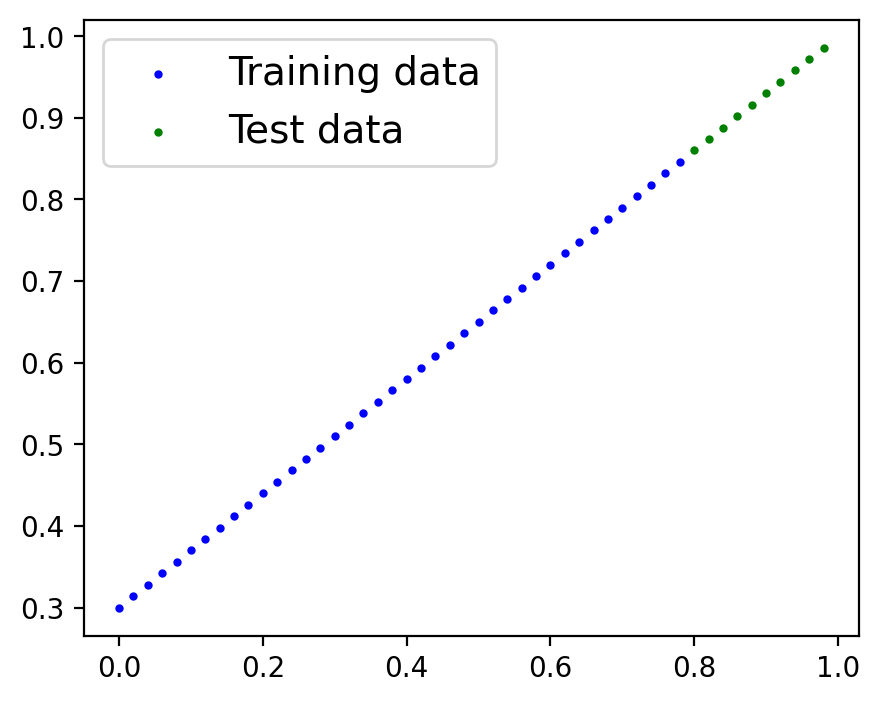

In [31]:
plot_prediction()

# 2. Build Linear Regression Model

*  Start with the random values
* Look at the training data and adjust the random values to better represent (get closer to) the ideal values ( weights and bias are used to create the data)

Achieved Throught two algorithms:
1. Gradient Descent
2. Backpropogation
*[Read More.....](https://www.geeksforgeeks.org/how-does-gradient-descent-and-backpropagation-work-together/)

## Model building essentials
* ```torch.nn``` - contains all of the buildings for computational graphs (a neural network can be considered a computational graph)
* ````torch.nn.Parameter``` - what parameters should our model try and learn, often a Pylorch layer from torch.nn will set these for us
* ```torch.nn.Module``` - The base class for all neural network modules, if you subclass it, you should overwrite forward()
* ```torch.optim``` - this where the optimizers in PyTorch live, they will help with gradient descent
* ```def forward() ```- All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

In [32]:
# Base class for all neural network model
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    # Initialize the model paramenters with random numbers
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    # Forward method to define the model and x is input data
  def forward(self,x:torch.Tensor) -> torch.Tensor:
      return self.weights * x + self.bias



In [33]:
# Create a random seed
torch.manual_seed(42)

# Instantiate the Model
model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [34]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

# 3.Make prediction using ```torch.infernce_mode()```

* We predict y_test based on X_test
* We can predictions without ``` torch.inferce_mode()```  but for large dataset it keeps track of gradient which makes it slower

In [35]:
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds,y_test

(tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

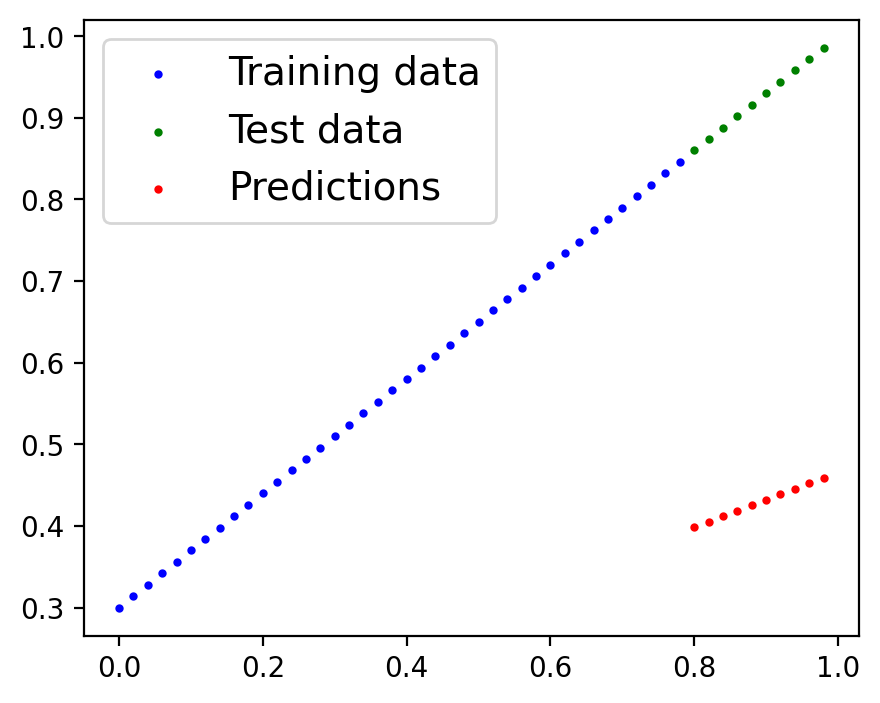

In [36]:
plot_prediction(predictions=y_preds)

# 4. Train Model

Move from some unknown parameters to some known parameters

* Note: Loss function may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function.
* **Loss function:** A function to measure how wrong your model's predictions of the ideal outputs
* **Optimizer**: Takes into account the loss of a model and adjusts the model's parameters (e.g. weight & bias)

Q: Which loss function and optimizer should I use?

A: This will be problem specific. But with experience, you'll get an idea of what works and what doesn't with your particular problem set.

For example, for a regression problem (like ours), a loss function of nn. LlLoss () and an optimizer like torch.optim. SGD() will suffice.

But for a classification problem like classifying whether a photo is of a dog or a cat, you'll likely want to use a loss function of

nn. BCELoss () (binary cross entropy loss).


In [14]:
# Setup a loss function
# loss_fn = torch.mean(torch.abs(y_preds-y_test))
loss_fn = nn.L1Loss()
loss_fn

# Setup Optimiser
optimiser  = torch.optim.SGD(params= model_0.parameters(),
                             lr =0.01) #<- Learning rate( size of these adjustments )

## Train Loop and Testing Loop
0. Loop through the data
1. Forward pass (this involves data moving through our model's 'forward()' functions) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss(**backpropogation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss(**gradient**)


In [15]:
# An epoch is one loop throught the data
epochs = 800
epoch_count = []
loss_values =[]
test_loss_values =[]

## TRAIN
for epoch in range(epochs):

  model_0.train() # train mode in Pytorch sets all the parametres that require gradients to require gradients
  # Forward Pass
  y_preds = model_0(X_train)
  #  Calculate the loss
  loss = loss_fn(y_preds,y_train)


  # Optimiser zero grad
  optimiser.zero_grad()

  # Perform backpropogation on the loss wrt to the parameters
  loss.backward()

  # Step the optimiser(perform the gradient descent)
  optimiser.step()

  # if epoch % 100 == 0:
  #       print(f'Epoch {epoch}/{epochs}, Loss: {loss.item()}')

  # Testing Loop
  model_0.eval() # turn_off the gradient track
  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred,y_test)
  if epoch % 100 == 0:
      epoch_count.append(epoch)
      loss_values.append(loss)
      test_loss_values.append(test_loss)
      print(f'Epoch {epoch}/{epochs}, Loss :{loss.item()} , Test Loss: {test_loss.item()}')


Epoch 0/800, Loss :0.31288138031959534 , Test Loss: 0.48106518387794495
Epoch 100/800, Loss :0.024458957836031914 , Test Loss: 0.05646304413676262
Epoch 200/800, Loss :0.008932482451200485 , Test Loss: 0.005023092031478882
Epoch 300/800, Loss :0.008932482451200485 , Test Loss: 0.005023092031478882
Epoch 400/800, Loss :0.008932482451200485 , Test Loss: 0.005023092031478882
Epoch 500/800, Loss :0.008932482451200485 , Test Loss: 0.005023092031478882
Epoch 600/800, Loss :0.008932482451200485 , Test Loss: 0.005023092031478882
Epoch 700/800, Loss :0.008932482451200485 , Test Loss: 0.005023092031478882


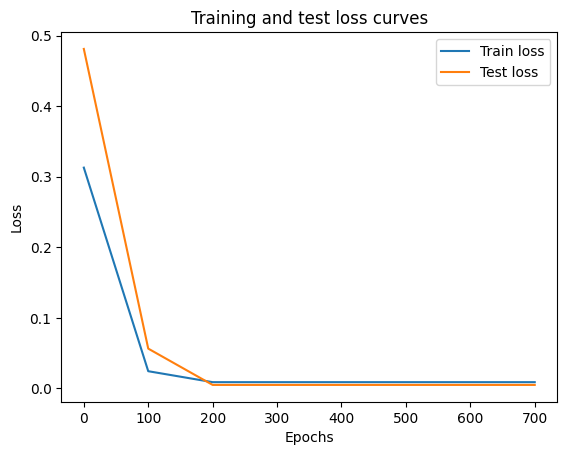

In [16]:
# Plot the loss curves
plt.plot(torch.tensor(epoch_count).cpu().numpy(), torch.tensor(loss_values).cpu().numpy(), label="Train loss")
plt.plot(torch.tensor(epoch_count).cpu().numpy(), torch.tensor(test_loss_values).cpu().numpy(), label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel ("Loss" )
plt. xlabel ( "Epochs")
plt.legend()

In [17]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

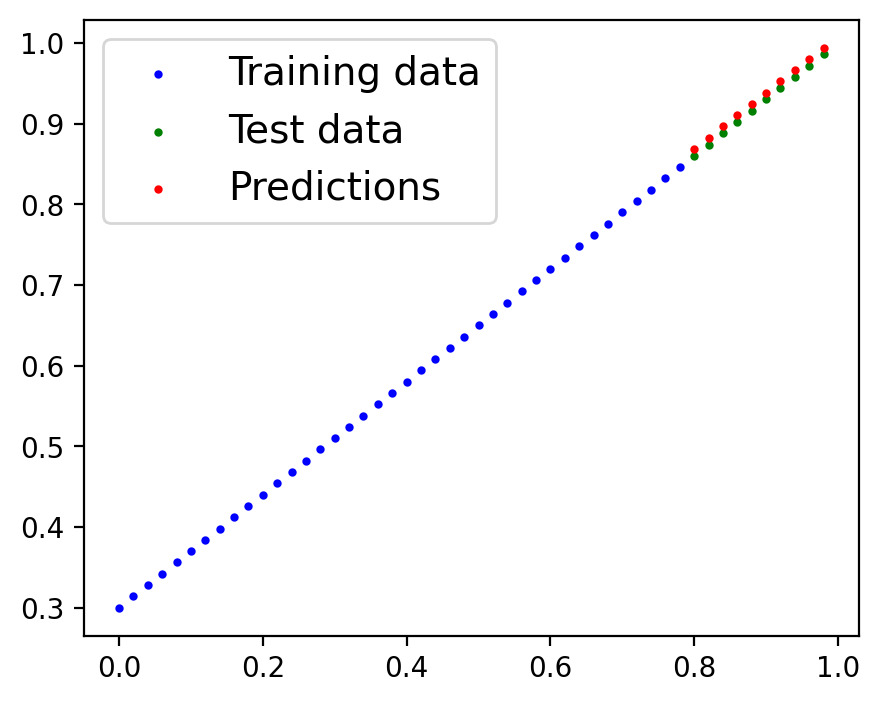

In [18]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

plot_prediction(predictions=y_preds_new)

# 5. Saving a model in PyTorch






There are three main methods you should about for saving and loading models in
PyTorch.
1. ```torch.save()``` - allows you save a PyTorch object in Python's pickle format
2. ```torch.load()``` - allows you load a saved PyTorch object
3. ```torch.nn.Module.load_state_dict()``` - this allows to load a model's saved state
dictionary

In [19]:
# SAVING PYTORCH MODEL

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

MODEL_NAME = 'Pytorch_Workflow.pth'
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

MODEL_SAVE_PATH


print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)

Saving model to: models/Pytorch_Workflow.pth


In [20]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1550 Jul 12 16:09 Pytorch_Workflow.pth


In [21]:
# Loading
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [22]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [23]:
loaded_model_0.eval()
with torch.inference_mode():
  preds = loaded_model_0(X_test)

preds == y_preds_new


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# Workflow 2.0

In [133]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Data preparation
weights_new = 0.6
bias_new = 0.4
X = torch.arange(0, 1, 0.04).unsqueeze(dim=1)
y = X * weights_new + bias_new

split = int(0.8 * len(X))
train_X, train_y = X[:split], y[:split]
test_X, test_y = X[split:], y[split:]

print(len(train_X), len(train_y), len(test_X), len(test_y))

20 20 5 5


In [134]:
# Linear Regression Model
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

# Model initialization
model_1 = LinearRegression()

# Loss function and optimizer
loss_func = nn.L1Loss()
optimiser = optim.SGD(model_1.parameters(), lr=0.01)

In [135]:
# Training loop
epochs = 800
epoch_1_count = []
loss_1_values = []
test_loss_1_values = []

for epoch in range(epochs):
    model_1.train()
    y_predss = model_1(train_X)
    loss = loss_func(y_predss, train_y)

    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

    # Test loop
    model_1.eval()
    with torch.inference_mode():
        test_predss = model_1(test_X)
        test_loss_1 = loss_func(test_predss, test_y)

    if epoch % 1 == 0:
        epoch_1_count.append(epoch)
        loss_1_values.append(float(loss.item()))
        test_loss_1_values.append(float(test_loss_1.item()))
        print(f'Epoch {epoch}/{epochs}, Loss: {loss.item():.4f}, Test Loss: {test_loss_1.item():.4f}')
        print(f'Weights: {model_1.weights.item()}, Bias: {model_1.bias.item()}')



Epoch 0/800, Loss: 0.3353, Test Loss: 0.5533
Weights: 0.14112409949302673, Bias: 0.2505461275577545
Epoch 1/800, Loss: 0.3238, Test Loss: 0.5399
Weights: 0.1449241042137146, Bias: 0.26054611802101135
Epoch 2/800, Loss: 0.3124, Test Loss: 0.5266
Weights: 0.14872410893440247, Bias: 0.2705461084842682
Epoch 3/800, Loss: 0.3009, Test Loss: 0.5132
Weights: 0.15252411365509033, Bias: 0.280546098947525
Epoch 4/800, Loss: 0.2895, Test Loss: 0.4999
Weights: 0.1563241183757782, Bias: 0.29054608941078186
Epoch 5/800, Loss: 0.2781, Test Loss: 0.4865
Weights: 0.16012412309646606, Bias: 0.3005460798740387
Epoch 6/800, Loss: 0.2666, Test Loss: 0.4732
Weights: 0.16392412781715393, Bias: 0.31054607033729553
Epoch 7/800, Loss: 0.2552, Test Loss: 0.4599
Weights: 0.1677241325378418, Bias: 0.32054606080055237
Epoch 8/800, Loss: 0.2437, Test Loss: 0.4465
Weights: 0.17152413725852966, Bias: 0.3305460512638092
Epoch 9/800, Loss: 0.2323, Test Loss: 0.4332
Weights: 0.17532414197921753, Bias: 0.34054604172706604

In [136]:
model_1.state_dict()

OrderedDict([('weights', tensor([0.5934])), ('bias', tensor([0.4065]))])

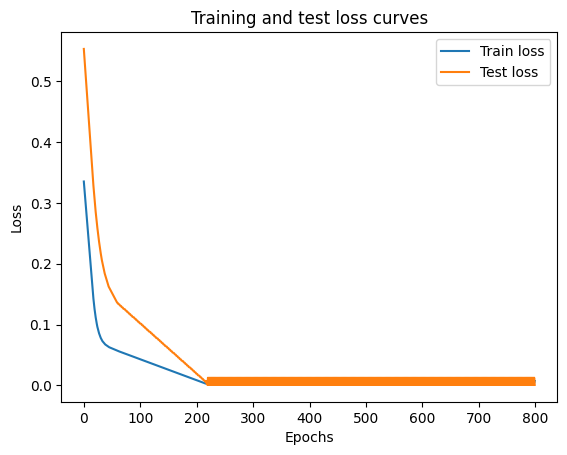

In [137]:
# Plotting the training and test loss curves
plt.plot(epoch_1_count, loss_1_values, label="Train loss")
plt.plot(epoch_1_count, test_loss_1_values, label="Test loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and test loss curves")
plt.legend()
plt.show()




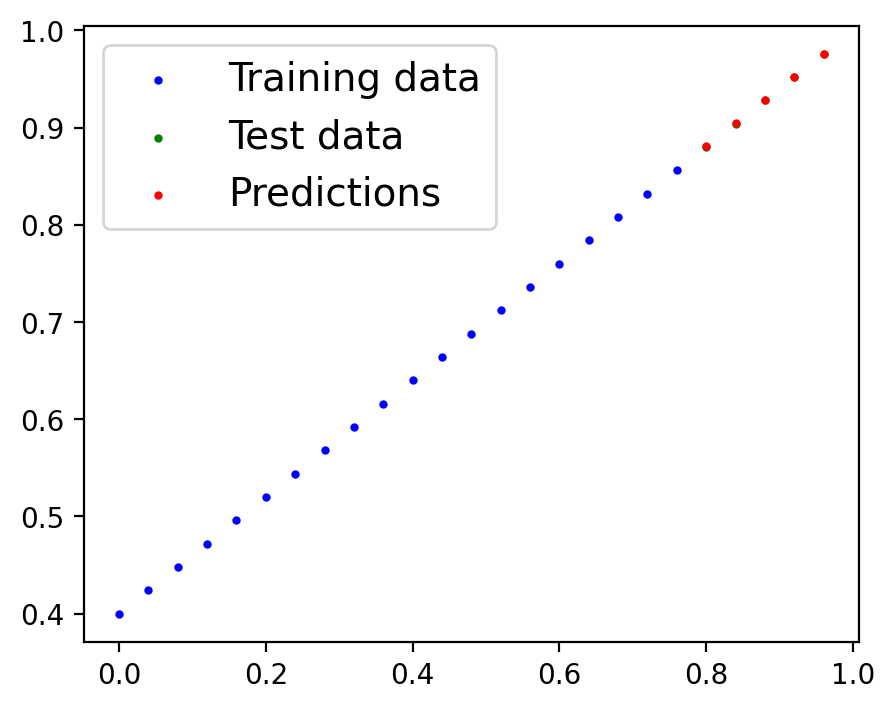

In [138]:
with torch.inference_mode():
  new_pred = model_1(test_X)

plot_prediction(train_data=train_X, train_labels=train_y, test_data=test_X, test_labels=test_y,predictions=new_pred)